# Depressive Disorder Prediction
### <i> Logistic Regression Model </i>

## Data Preprocessing
The first step of building a model is to preprocess the obtained dataset that will be used for training and evaluating the model. This steps include importing the data, summarizing the data, finding the missing values, data imputation if there is any missing values. All of these steps produce an outcome dataset which is clean and ready for further procedures.

## Importing dependencies
pandas is used for importing csv dataset into pandas dataframe, which can be manipulated, imputed and used as a structured dataframe in the python settings.

In [2]:
import pandas as pd

## Importing the csv file into python dataframe
The dataset used for this model development is the cleaner version of BRFSS survey conducted by CDC, USA. The main dataset contains over 300 variables and many instances. A cleaned version of the dataset suitable for predicting heart disease is being used in this model building. The cleaner version is later modified to seve our purpose of developing a predictive model using risk factors of depressive disorders.

In [3]:
df = pd.read_csv("heart_2022_no_nans.csv")
df.head() # Printing the first 5 rows of the dataframe

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [12]:
df.columns # Viewing the column names

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

## Selecting Features
Only the features seemed to be relevant for model building will be selected and the variables deemed to be not useful for model building will be droped.

In [13]:
# Dropping columns
# State, PhysicalHealthDays, MentalHealthDays, LastCheckupTime, RemovedTeeth, DeafOrHardOfHearing, BlindOrVisionDifficulty,
# DifficultyConcentrating, DifficultyWalking, DifficultyDressingBathing, DifficultyErrands, FluVaxLast12, PneumoVaxEver, TetanusLast10Tdap,
# HighRiskLastYear

In [43]:
# Columns to drop
columns_to_drop = ['State', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'RemovedTeeth', 'DeafOrHardOfHearing',
                   'BlindOrVisionDifficulty','DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
                   'DifficultyErrands', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
                   'HighRiskLastYear']

# Drop columns
data = df.drop(columns=columns_to_drop, axis=1)

data.head()

,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,CovidPos
0,Female,Very good,Yes,9.0,No,No,No,No,No,No,...,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,No
1,Male,Very good,Yes,6.0,No,No,No,No,No,No,...,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,No
2,Male,Very good,No,8.0,No,No,No,No,No,No,...,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,Yes
3,Female,Fair,Yes,9.0,No,No,No,No,Yes,No,...,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes
4,Female,Good,Yes,5.0,No,No,No,No,No,No,...,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,No


In [44]:
data.columns

Index(['Sex', 'GeneralHealth', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage',
       'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters',
       'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting',
       'CovidPos'],
      dtype='object')

In [45]:
data.shape

(246022, 25)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    246022 non-null  object 
 1   GeneralHealth          246022 non-null  object 
 2   PhysicalActivities     246022 non-null  object 
 3   SleepHours             246022 non-null  float64
 4   HadHeartAttack         246022 non-null  object 
 5   HadAngina              246022 non-null  object 
 6   HadStroke              246022 non-null  object 
 7   HadAsthma              246022 non-null  object 
 8   HadSkinCancer          246022 non-null  object 
 9   HadCOPD                246022 non-null  object 
 10  HadDepressiveDisorder  246022 non-null  object 
 11  HadKidneyDisease       246022 non-null  object 
 12  HadArthritis           246022 non-null  object 
 13  HadDiabetes            246022 non-null  object 
 14  SmokerStatus           246022 non-nu

In [ ]:
# Coding the 'Sex' column: Here Male = 1 and Female = 0

data.Sex = [1 if value == "Male" else 0 for value in data.Sex]

#Coding the 'GeneralHealth' column: 

# Define a dictionary to map categories to numerical values
category_mapping = {'Poor': 0, 'Good': 1, 'Fair': 2, 'Very good': 3, 'Excellent': 4}
# Use the map function to apply the mapping to the column
data.GeneralHealth = data.GeneralHealth.map(category_mapping)

In [49]:
# Coding the 'PhysicalActivities' column:
data.PhysicalActivities = [1 if value == "Yes" else 0 for value in data.PhysicalActivities]
# Coding the 'HadHeartAttack' column:
data.HadHeartAttack = [1 if value == "Yes" else 0 for value in data.HadHeartAttack]

data.HadAngina = [1 if value == "Yes" else 0 for value in data.HadAngina]

data.HadStroke = [1 if value == "Yes" else 0 for value in data.HadStroke]

data.HadAsthma = [1 if value == "Yes" else 0 for value in data.HadAsthma]

data.HadSkinCancer = [1 if value == "Yes" else 0 for value in data.HadSkinCancer]

data.HadCOPD = [1 if value == "Yes" else 0 for value in data.HadCOPD]

data.HadDepressiveDisorder = [1 if value == "Yes" else 0 for value in data.HadDepressiveDisorder]

data.HadKidneyDisease = [1 if value == "Yes" else 0 for value in data.HadKidneyDisease]

data.HadArthritis = [1 if value == "Yes" else 0 for value in data.HadArthritis]

In [54]:
# Coding the HadDiabetes column
# Define a dictionary to map categories to numerical values
category_mapping = {'No': 0, 'Yes': 1, 'Yes, but only during pregnancy (female)': 2, 'Very good': 3, 'No, pre-diabetes or borderline diabetes': 0}
# Use the map function to apply the mapping to the column
data.HadDiabetes = data.HadDiabetes.map(category_mapping)

In [58]:
# Coding the SmokerStatus column
# Define a dictionary to map categories to numerical values
category_mapping = {'Never smoked': 0, 'Former smoker': 1, 'Current smoker - now smokes some days': 2, 'Current smoker - now smokes every day': 3}
# Use the map function to apply the mapping to the column
data.SmokerStatus = data.SmokerStatus.map(category_mapping)

In [62]:
# Coding the ECigaretteUsage column
# Define a dictionary to map categories to numerical values
category_mapping = {'Never used e-cigarettes in my entire life': 0, 'Not at all (right now)': 1, 'Use them some days': 2, 'Use them every day': 3}
# Use the map function to apply the mapping to the column
data.ECigaretteUsage = data.ECigaretteUsage.map(category_mapping)

In [65]:
data.ChestScan = [1 if value == "Yes" else 0 for value in data.ChestScan]

In [69]:
# Coidng the AgeCategory column: Using the array
# Define categories and their numerical values in a list
categories = ['Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older', 'Age 50 to 54', 'Age 40 to 44', 'Age 60 to 64', 'Age 55 to 59',
              'Age 45 to 49', 'Age 35 to 39', 'Age 25 to 29', 'Age 30 to 34', 'Age 18 to 24']
numerical_values = [0,1,2,3,4,5,6,7,8,9,10,11,12]

# Create a dictionary mapping categories to numerical values
category_mapping = dict(zip(categories, numerical_values))

# Use the map function to apply the mapping to the column
data['AgeCategory'] = data['AgeCategory'].map(category_mapping)

In [72]:
# Coidng the AgeCategory column: Using the array
# Define categories and their numerical values in a list
categories = ['White only, Non-Hispanic', 'Black only, Non-Hispanic', 'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic', 'Hispanic']
numerical_values = [0,1,2,3,4]

# Create a dictionary mapping categories to numerical values
category_mapping = dict(zip(categories, numerical_values))

# Use the map function to apply the mapping to the column
data['RaceEthnicityCategory'] = data['RaceEthnicityCategory'].map(category_mapping)

In [77]:
data.AlcoholDrinkers = [1 if value == "Yes" else 0 for value in data.AlcoholDrinkers]

In [79]:
data.HIVTesting = [1 if value == "Yes" else 0 for value in data.HIVTesting]

In [81]:
data.CovidPos = [1 if value == "Yes" else 0 for value in data.CovidPos]

In [87]:
data.head()

,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,CovidPos
0,0,3,1,9.0,0,0,0,0,0,0,...,0,0,0,0,1.60,71.67,27.99,0,0,0
1,1,3,1,6.0,0,0,0,0,0,0,...,0,0,0,1,1.78,95.25,30.13,0,0,0
2,1,3,0,8.0,0,0,0,0,0,0,...,0,1,0,2,1.85,108.86,31.66,1,0,1
3,0,2,1,9.0,0,0,0,0,1,0,...,0,0,0,3,1.70,90.72,31.32,0,0,1
4,0,1,1,5.0,0,0,0,0,0,0,...,0,0,0,3,1.55,79.38,33.07,0,0,0


In [85]:
# Specify columns to change to categorical type
columns_to_convert = ['Sex', 'GeneralHealth', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma','HadSkinCancer',
                       'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
                       'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'CovidPos']

# Use astype method to change data types
data[columns_to_convert] = data[columns_to_convert].astype('category')

# Display the DataFrame after data type conversion
print(data.dtypes)

Sex                      category
GeneralHealth            category
PhysicalActivities       category
SleepHours                float64
HadHeartAttack           category
HadAngina                category
HadStroke                category
HadAsthma                category
HadSkinCancer            category
HadCOPD                  category
HadDepressiveDisorder    category
HadKidneyDisease         category
HadArthritis             category
HadDiabetes              category
SmokerStatus             category
ECigaretteUsage          category
ChestScan                category
RaceEthnicityCategory    category
AgeCategory              category
HeightInMeters            float64
WeightInKilograms         float64
BMI                       float64
AlcoholDrinkers          category
HIVTesting               category
CovidPos                 category
dtype: object


<Axes: xlabel='HadDepressiveDisorder'>

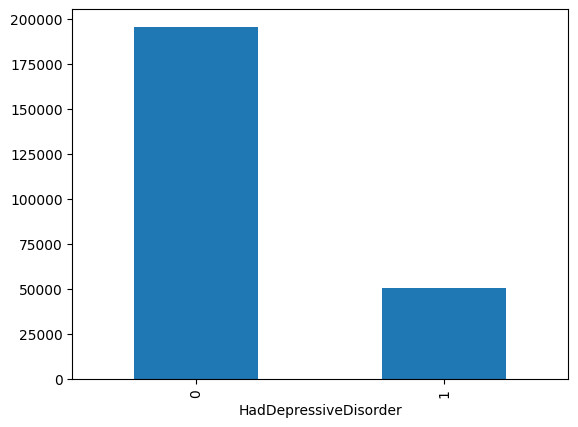

In [113]:
data["HadDepressiveDisorder"].value_counts().plot(kind = "bar") # Bar plot to see the distribution of the categories

## Data Preprocessing
The final dataset is divided into features (what we will use to predict the value of the predictors) as X and target (the variable we will try to predict using the model) as y.

In [114]:
X = data.drop(['HadDepressiveDisorder'], axis = 1)
y = data['HadDepressiveDisorder']

In [115]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: HadDepressiveDisorder, dtype: category
Categories (2, int64): [0, 1]

## Data Normalization / Standardization

In [116]:
from sklearn.preprocessing import StandardScaler
# Creating a Scaler Object
scaler = StandardScaler()

# Fitting the Scaler into the Dataset and Data Transformation
X_scaled = scaler.fit_transform(X)

In [117]:
print(X_scaled)

[[-0.96171154  0.5902691   0.5347264  ... -1.1054953  -0.72330312
  -0.63265708]
 [ 1.03981283  0.5902691   0.5347264  ... -1.1054953  -0.72330312
  -0.63265708]
 [ 1.03981283  0.5902691  -1.87011526 ...  0.90457191 -0.72330312
   1.58063512]
 ...
 [ 1.03981283 -1.09595359  0.5347264  ...  0.90457191  1.38254622
   1.58063512]
 [-0.96171154  1.43338044  0.5347264  ... -1.1054953   1.38254622
  -0.63265708]
 [ 1.03981283  0.5902691  -1.87011526 ... -1.1054953   1.38254622
   1.58063512]]


## Data Splitting
Splitting the dataset into training data (to train machine for predicting value of target) and test data (to check the accuracy of the prediction of the model) by a ratio of 80%:20% of the main dataset.

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state=42, stratify = y)

## Tarining the Model

In [119]:
from sklearn.linear_model import LogisticRegression

# Creating the logistic model
lr = LogisticRegression()

# Training the model on training data
lr.fit(X_train, y_train)

# Predict the target variable using test predictors
y_predict = lr.predict(X_test)

In [120]:
y_predict # Printing the predicted target values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Calculating the Accuracy of the Model

In [121]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.81


This indicates the model can predict the risk of having depressive disorder using the features with an accuarcy of 81%

## Final Classification Report

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     39081
           1       0.61      0.15      0.24     10124

    accuracy                           0.81     49205
   macro avg       0.71      0.56      0.56     49205
weighted avg       0.77      0.81      0.76     49205

